In [15]:
import pandas as pd
import numpy as np

from scipy.stats import boxcox, probplot
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, RidgeCV

import seaborn as sns

In [2]:
data  = pd.read_csv('../data/calls_data.csv')
data.head()

,address,duration_minutes,feat_1,feat_2,geometry,poly_side,atm,bank,bus_station,bus_stop,cafe,device_charging_station,office,public_service,restaurant,shelter,station,traffic_signals,waste_basket
0,8811aa602dfffff,5.092667,0.0,25.0,"POLYGON ((37.75103240708841 55.80603592669851,...",poly3,1.0,0.0,0.0,8.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,8811aa45d9fffff,6.037037,0.0,63.0,"POLYGON ((37.40263832553934 55.71842073952227,...",poly0,5.0,3.0,0.0,5.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
2,881181a235fffff,4.722727,0.0,11.0,"POLYGON ((37.74271427608124 55.43691297888912,...",poly1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,8811aa722bfffff,5.868982,0.0,36.0,"POLYGON ((37.42241082476207 55.85767681439805,...",poly2,2.0,2.0,0.0,12.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8811aa714dfffff,2.937719,0.0,19.0,"POLYGON ((37.45469517717559 55.7843306893976, ...",poly2,1.0,0.0,0.0,9.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0


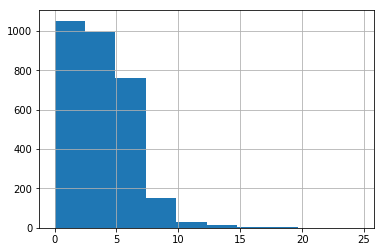

In [3]:
data['duration_minutes'].hist()

In [4]:
data = data.loc[data['duration_minutes'] != 0]
X = data.drop(['address', 'geometry', 'poly_side', 'duration_minutes'], axis=1)
y = data['duration_minutes']

((array([-3.5025565 , -3.25887541, -3.1241227 , ...,  3.1241227 ,
          3.25887541,  3.5025565 ]),
  array([5.08305958e-04, 9.15010572e-04, 2.12894199e-03, ...,
         1.72166666e+01, 1.90000000e+01, 2.45833330e+01])),
 (2.5386054994218363, 3.6894608374072875, 0.9694042326531059))

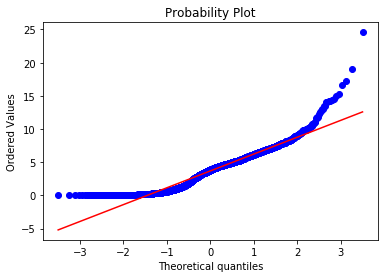

In [5]:
f, ax = plt.subplots()
probplot(y, plot=ax)

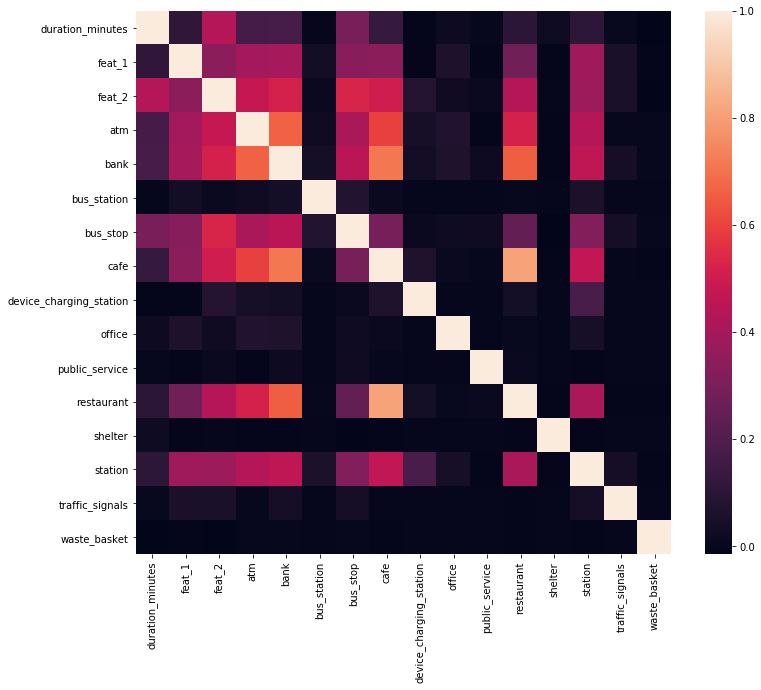

In [6]:
plt, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data.drop(['address', 'geometry', 'poly_side'], axis=1).corr(), ax=ax)

In [13]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train = data.drop(['address', 'geometry', 'poly_side', 'duration_minutes'], axis=1)
X_train = X_train.loc[data['poly_side'].isin(['poly1', 'poly2'])]
y_train = np.log1p(data['duration_minutes'][data['poly_side'].isin(['poly1', 'poly2'])])

In [18]:
X_valid = data.drop(['address', 'geometry', 'poly_side', 'duration_minutes'], axis=1)
X_valid = X_valid.loc[data['poly_side'].isin(['poly0', 'poly3'])]
y_valid = np.log1p(data['duration_minutes'][data['poly_side'].isin(['poly0', 'poly3'])])

In [19]:
scaler = StandardScaler()

In [20]:
X_train_scale = scaler.fit_transform(X_train)
X_valid_scale = scaler.transform(X_valid)

In [21]:
def train_model(model, X_train, y_train, X_valid, y_valid, feature_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    print(f'RMSE: {np.sqrt(mean_squared_error((y_valid), (y_pred)))}')
    print(pd.DataFrame(model.coef_, index=feature_names,
                       columns=['weight']).sort_values(by='weight', ascending=False))


In [22]:
linreg = LinearRegression()
train_model(linreg, X_train_scale, y_train, X_valid_scale, y_valid, X.columns)

RMSE: 0.5539479445508376
                               weight
feat_2                   3.300919e-01
bus_stop                 1.274065e-01
shelter                  2.062220e-02
atm                      1.910487e-02
office                   3.909370e-03
traffic_signals          0.000000e+00
public_service          -1.387779e-17
waste_basket            -6.334953e-03
bus_station             -9.922410e-03
feat_1                  -1.398096e-02
station                 -2.023344e-02
cafe                    -2.659738e-02
device_charging_station -2.726415e-02
restaurant              -3.410706e-02
bank                    -4.863289e-02


In [23]:
lasso_model = Lasso(random_state=16, alpha=0.01)

In [24]:
train_model(lasso_model, X_train_scale, y_train, X_valid_scale, y_valid, X.columns)

RMSE: 0.5535936097863409
                           weight
feat_2                   0.311594
bus_stop                 0.114649
shelter                  0.010570
atm                      0.000000
bus_station             -0.000000
office                   0.000000
public_service           0.000000
traffic_signals          0.000000
waste_basket            -0.000000
feat_1                  -0.001847
station                 -0.014036
device_charging_station -0.017374
cafe                    -0.017975
bank                    -0.027483
restaurant              -0.031184


In [25]:
lasso_cv_model = LassoCV(random_state=16)

In [26]:
train_model(lasso_cv_model, X_train_scale, y_train, X_valid_scale, y_valid, X.columns)

RMSE: 0.5535334265866467
                           weight
feat_2                   0.321748
bus_stop                 0.121683
shelter                  0.015785
atm                      0.003433
office                   0.000208
public_service           0.000000
traffic_signals          0.000000
waste_basket            -0.001508
bus_station             -0.004892
feat_1                  -0.007662
station                 -0.016856
cafe                    -0.020904
device_charging_station -0.022527
restaurant              -0.033380
bank                    -0.035483


/Users/kosmosivanov/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [27]:
ridge_model = Ridge(random_state=16)

In [28]:
train_model(ridge_model, X_train_scale, y_train, X_valid_scale, y_valid, X.columns)


RMSE: 0.5539574773061426
                           weight
feat_2                   0.329760
bus_stop                 0.127412
shelter                  0.020610
atm                      0.019084
office                   0.003909
public_service           0.000000
traffic_signals          0.000000
waste_basket            -0.006336
bus_station             -0.009922
feat_1                  -0.013943
station                 -0.020221
cafe                    -0.026531
device_charging_station -0.027227
restaurant              -0.034100
bank                    -0.048494


In [29]:
ridge_cv_model = RidgeCV()

In [30]:
train_model(ridge_cv_model, X_train_scale, y_train, X_valid_scale, y_valid, X.columns)


RMSE: 0.5540470621127068
                           weight
feat_2                   0.326808
bus_stop                 0.127451
shelter                  0.020504
atm                      0.018905
office                   0.003905
public_service           0.000000
traffic_signals          0.000000
waste_basket            -0.006344
bus_station             -0.009915
feat_1                  -0.013605
station                 -0.020106
cafe                    -0.025949
device_charging_station -0.026894
restaurant              -0.034020
bank                    -0.047267
